In [2]:
from nmon import *

In [3]:
EC_shunt = 0.18

EJM_EC = 5
EJN_EC = 5


N_ng1 = 6
N_ng2 = 6
N_ng3 = 6
N_ng4 = 6

ng1_list = np.linspace(0, 1, N_ng1)
ng2_list = np.linspace(0, 1, N_ng2)
ng3_list = np.linspace(0, 1, N_ng3)
ng4_list = np.linspace(0, 1, N_ng4)

w01_list = np.zeros([N_ng1, N_ng2, N_ng3, N_ng4])

nmon = Nmon(N=2, M=3, EJM=EJM_EC*EC_shunt, EJN=EJN_EC*EC_shunt, EC_shunt=EC_shunt)

for i, ng1 in enumerate(tqdm(ng1_list)):
    for j, ng2 in enumerate(ng2_list):
        for k, ng3 in enumerate(ng3_list):
            for l, ng4 in enumerate(ng4_list):
                for attempt in range(10):
                    try:
                        nmon.hamiltonian_calc(flux=0, ng=[ng1, ng2, ng3, ng4], make_plot=False, num_levels=4)
                        w01_list[i, j, k, l] = nmon.transition_freqs[0]
                    except Exception:
                        continue
                    if w01_list[i, j, k, l] != 0:
                        break



  0%|          | 0/6 [5:54:31<?, ?it/s]


KeyboardInterrupt: 

In [4]:
np.save("./data_arrays_ng/N={}_M={}_EC_shunt={}_w01_list.npy".format(nmon.N, nmon.M, round(nmon.EC_total,2 )), w01_list)

In [5]:
w01_list_ng1234 = np.load("./data_arrays_ng/N={}_M={}_EC_shunt={}_w01_list.npy".format(nmon.N, nmon.M, round(nmon.EC_total,2 )))

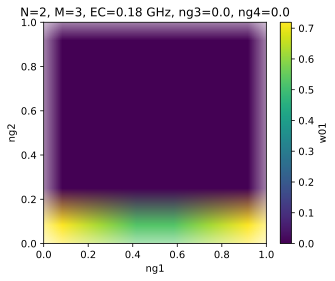

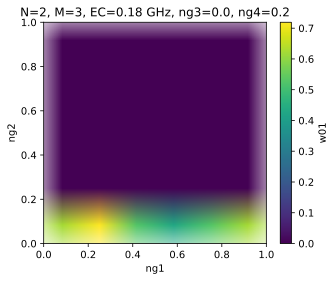

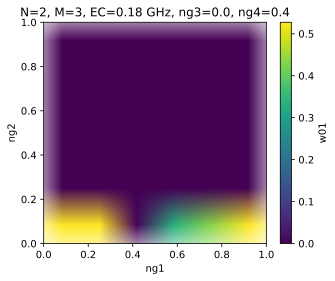

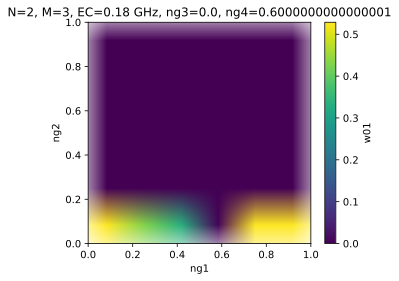

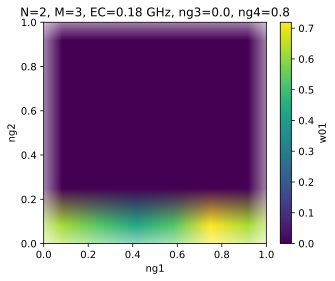

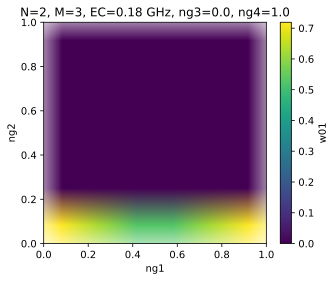

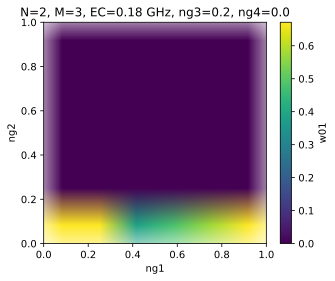

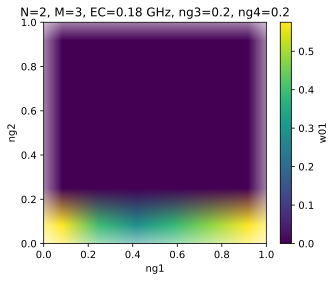

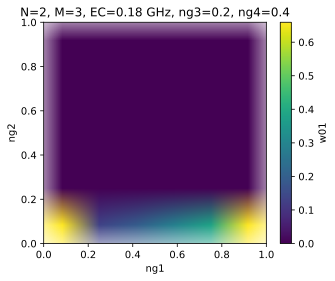

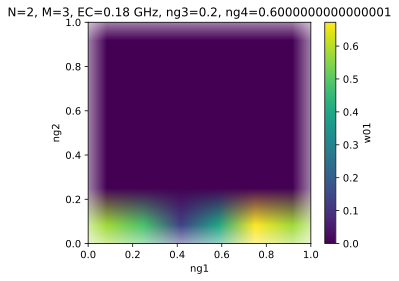

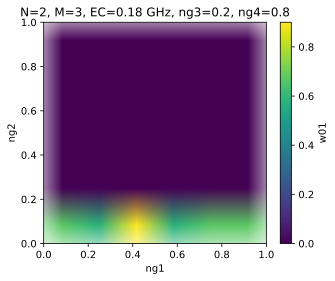

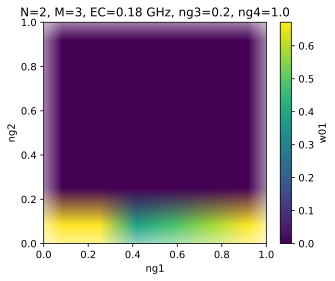

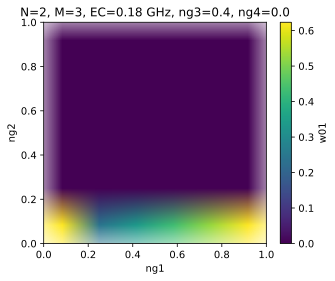

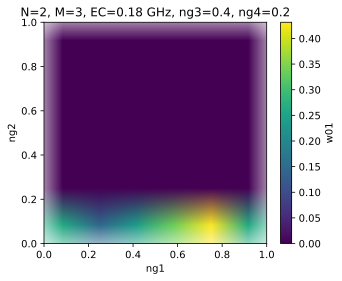

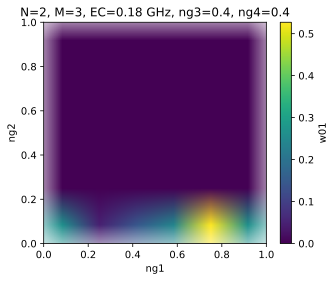

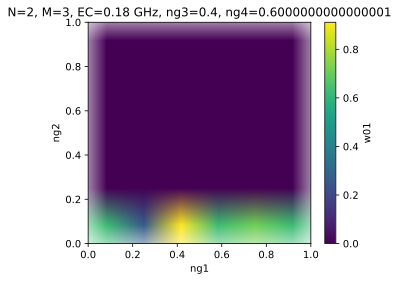

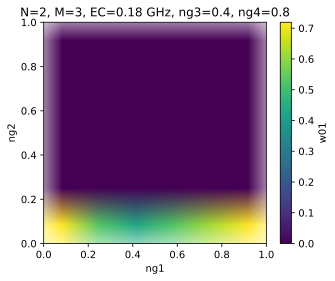

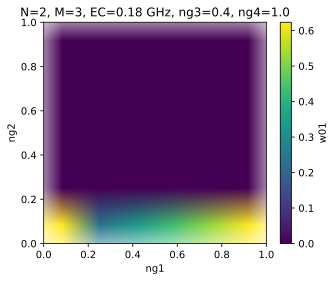

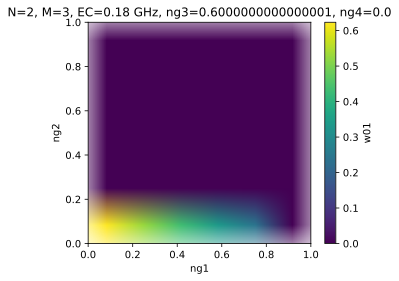

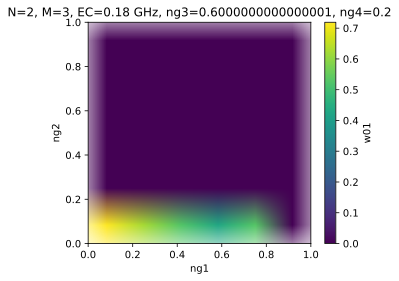

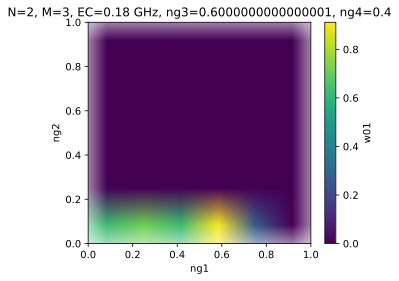

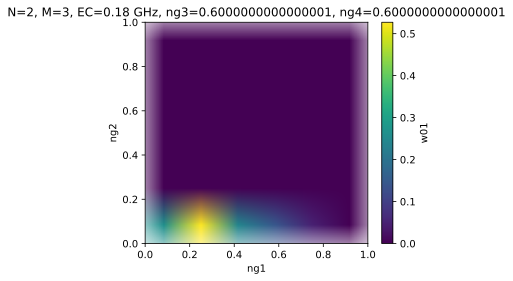

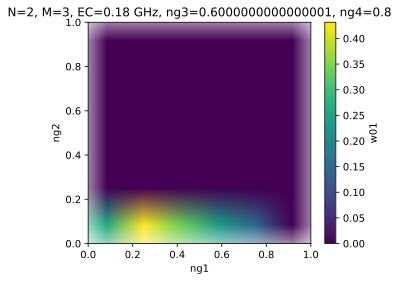

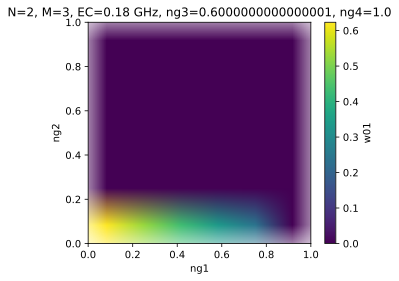

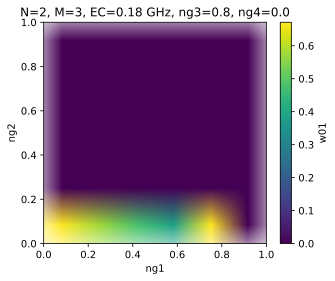

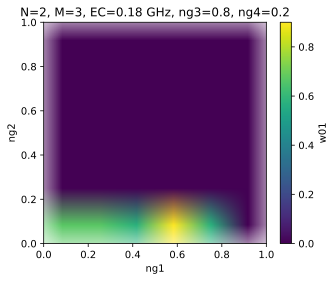

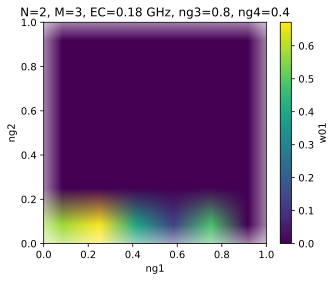

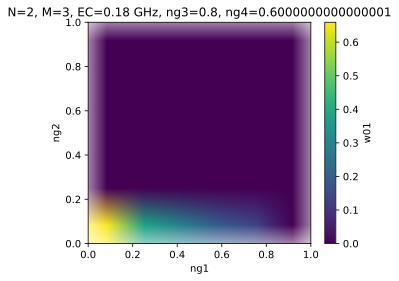

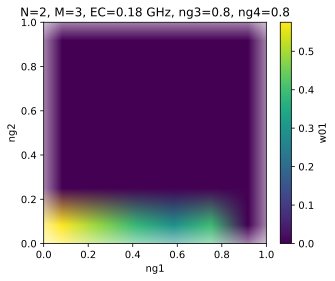

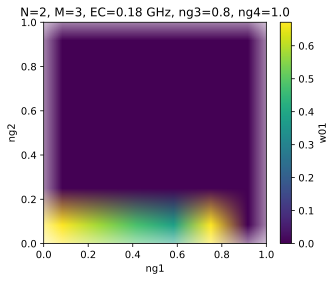

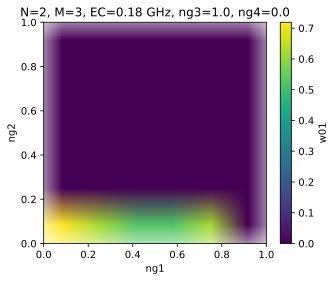

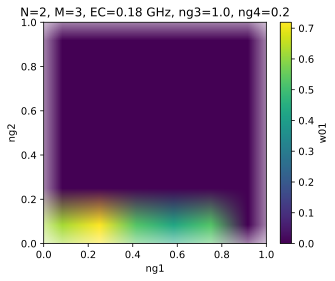

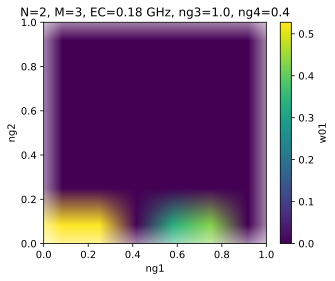

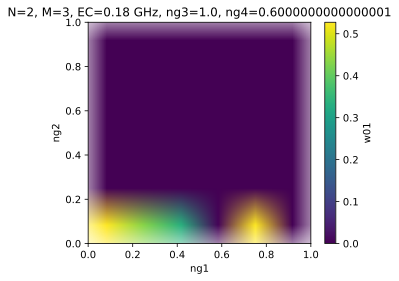

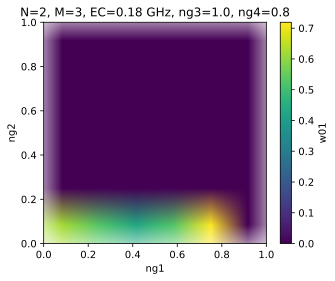

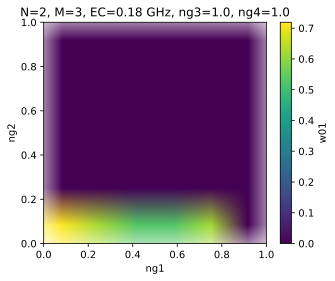

In [6]:
for k, ng3 in enumerate(ng3_list):
    for l, ng4 in enumerate(ng4_list):
    
        w01_list = w01_list_ng1234[ :,:, k, l]

        ng1_grid, ng2_grid = np.meshgrid(ng1_list, ng2_list)

        plt.figure(figsize=(5, 4))
        # Using imshow for pixel plot
        plt.imshow(w01_list, origin='lower', aspect='auto',
                extent=[ng1_list.min(), ng1_list.max(), ng2_list.min(), ng2_list.max()],
                cmap='viridis', interpolation='none')
        plt.colorbar(label='w01')
        plt.xlabel('ng1')
        plt.ylabel('ng2')

        plt.title("N={}, M={}, EC={} GHz, ng3={}, ng4={}".format(nmon.N, nmon.M, round(nmon.EC_shunt,2 ), ng3, ng4))
        # plt.xticks(ticks=np.arange(len(EJM_list[::]))[::2], labels=[f'{round(i/EC_total,1)}' for i in EJM_list[::2]])
        # plt.yticks(ticks=np.arange(len(EJN_list[::]))[::2], labels=[f'{round(i/EC_total,1)}' for i in EJN_list[::2]])
        # plt.savefig("./data_arrays_ng/N={}_M={}_EC_shunt={}_w01_list.pdf".format(nmon.N, nmon.M, round(nmon.EC_shunt, 2)))
        plt.show()